In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

n = 100 # grid size nxn
# move configuration. If true move randomly otherwise
# goes sequentially by row and columns and move to the
# closest empty cell
RANDOM_SELECT, RANDOM_MOVE = True, True

grid = np.zeros((n, n))
types = [0, 1, 2] # cell types: 0 is empty cell
probs = [0.1,0.45, 0.45]
happy_bound = 7 # number of equal cells in neighbourdhood to be happy

# init the grid
np.random.seed = 42 # use to reproduce results
grid = np.random.choice(types, (n, n), p=probs)

def get_neighbourhood(x, y):
    up = y+1 if y+1 < n else 0
    down = y-1 if y-1 > 0 else n-1
    left = x-1 if x-1 > 0 else n-1
    right = x+1 if x+1 < n else 0
    
    top = grid[x, up]
    top_left = grid[left, up]
    top_right = grid[right, up]
    
    down = grid[x, down]
    down_left = grid[left, down]
    down_right = grid[right, down]
    
    left = grid[left, y]
    right = grid[right, y]
    
    return [top, top_left, top_right,
           left, right,
            down, down_left, down_right]

def is_happy(x, y):
    cell_type = grid[x][y]
    if cell_type == 0:
        return True # empty cells are always happy
    nb = get_neighbourhood(x, y)
    count = np.count_nonzero(nb == cell_type)
#     count += np.count_nonzero(nb == 0) # happy if empty nb
    if count >= happy_bound:
        return True
    else:
        return False

def move_closest_empty_cell(x, y):
    def check_valid_position(x):
        x = x if x > 0 else 0
        x = x if x < n else n
        return x
    i, j = x, y
    r = 0 #radius of search
    
    cell = -1 #init
    found = False
    
    while not found:
        r+=1
        left = check_valid_position(x-r)
        right = check_valid_position(x+r)
        down = check_valid_position(y-r)
        up = check_valid_position(y+r)
        
        for i in range(left, right):
            for j in range(down, up):
                if grid[i, j] == 0:
                    found = True
                    grid[x, y], grid[i, j] = grid[i, j], grid[x, y]
                    return

def move_randomly(x, y):
    '''Moves a cell(x,y) to a random empty cell'''
    
    cell_type = grid[x][y]
    idx = np.where(grid == 0) # look for empty cell
    n = len(idx[0])
    rnd_idx = np.random.randint(n) # choose randomly an empty cell
    x_dest, y_dest = idx[0][rnd_idx], idx[1][rnd_idx]
    # move cell
    grid[x][y] = 0
    grid[x_dest][y_dest] = cell_type
    
def plot_grid():
    plt.plot()
    colors = ['black', 'red', 'blue']
    values = (0, 1, 2)
    cmap = mpl.colors.ListedColormap(colors)
    im = plt.imshow(grid, cmap=cmap)
    plt.title('Grid')
    colors = [ im.cmap(im.norm(value)) for value in values]
    labels = ['Empty cell', 'Agent 1', 'Agent 2']
    patches = [ mpatches.Patch(color=colors[i], label=labels[i] ) for i in range(len(values)) ]
    # put those patched as legend-handles into the legend
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    plt.show()
    
def move_one_step_randomly():
    moved = 0
    for i in range(n**2): # choose n cells with repetition
        x, y = np.random.randint(n), np.random.randint(n) 
        if not is_happy(x, y):
            if RANDOM_MOVE:
                move_randomly(x, y)
            else:
                move_closest_empty_cell(x, y)
            moved += 1
    return moved # which is also the number of cells that moved but in this case is random
            
    
def move_one_step_consequentially():
    moved = 0
    for x in range(n):
            for y in range(n):
                if not is_happy(x, y):
                    moved += 1
                    if RANDOM_MOVE:
                        move_randomly(x, y)
                    else:
                        move_closest_empty_cell(x, y)
    return moved # which is also the number of cells that moved

time_max = 200
moved_count = np.ones(time_max)
def run():
    for t in range(time_max):
        if RANDOM_SELECT:
            moved = move_one_step_randomly()
        else:
            moved = move_one_step_consequentially()
        moved_count[t] = moved

def plot_unhappy():
    t = np.arange(time_max)
    plt.plot()
    plt.plot(t, moved_count, 'bo')
    plt.title('Number of cells moved in each iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Moved cells')

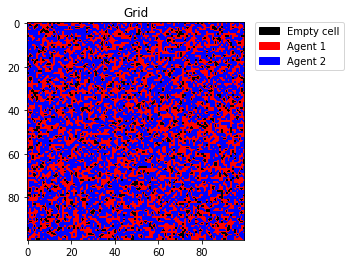

In [6]:
plot_grid() #initial grid

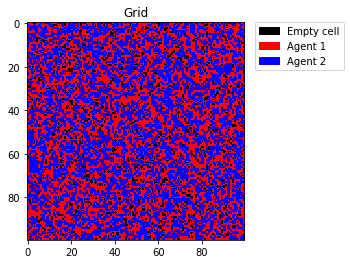

In [7]:
run()
plot_grid() # final grid

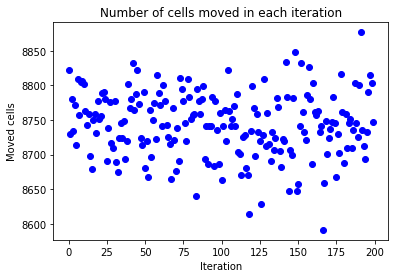

In [8]:
plot_unhappy()